In [1]:
import pandas as pd

## 예제 10-13 맛집 데이터를 정돈하기 

In [2]:
matzip = pd.read_csv('./data/matzipData.csv', encoding='utf-8')

In [3]:
matzip.shape

(400, 9)

In [4]:
matzip.dtypes

Restaurant Name    object
Rating             object
Address            object
Tel                object
Food               object
Price              object
Parking            object
Operating Time     object
Holiday            object
dtype: object

In [5]:
matzip.head()

Restaurant Name Rating              Address           Tel           Food  \
0         이나니와요스케    4.4  서울시 중구 을지로1가 192-11   02-772-9994   라멘 / 소바 / 우동   
1            바오차이    4.4     서울시 중구 을지로2가 203  02-6031-0107  정통 중식 / 일반 중식   
2            라칸티나    4.4      서울시 중구 을지로1가 50   02-777-2579           이탈리안   
3             라세느    4.3         서울시 중구 소공동 1   02-317-7171             뷔페   
4            산수갑산    4.3    서울시 중구 인현동1가 15-4  02-2275-6654    탕 / 찌개 / 전골   

     Price  Parking                       Operating Time Holiday  
0   만원-2만원   주차공간없음                        11:00 - 23:00       일  
1  2만원-3만원  유료주차 가능                        11:30 - 21:30     NaN  
2  3만원-4만원      NaN  월-토: 11:30 - 23:00 일: 17:30 - 23:00     NaN  
3   4만원 이상       발렛                        06:00 - 22:00     NaN  
4    만원 미만  유료주차 가능  월-금: 11:30 - 22:00 토: 11:30 - 20:00       일

In [6]:
matzip.Holiday.isnull().sum()

274

In [7]:
matzip[matzip.Holiday.isnull()][['Holiday']].head()

Holiday
1     NaN
2     NaN
3     NaN
5     NaN
6     NaN

In [8]:
matzip.Holiday.value_counts().head()

일       75
월       21
토, 일     7
화        3
일, 월     2
Name: Holiday, dtype: int64

In [9]:
matzip.Holiday = matzip.Holiday.fillna("연중무휴")

In [10]:
matzip.Holiday.isnull().sum()

0

In [11]:
matzip.Price.value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [12]:
matzip.Price.isnull().sum()

3

In [13]:
matzip_Price = matzip.Price.fillna('10000').copy()

In [14]:
matzip_Price.isnull().sum()

0

In [15]:
matzip_Price = (matzip_Price.str.replace("만원","10000") 
     .str.replace('210000',"20000")     
     .str.replace('310000',"30000")     
     .str.replace('410000',"40000")  
     .str.replace('미만',"")  
     .str.replace('이상',"") 
     .str.replace('10000-',"")     
     .str.replace('20000-',"")     
     .str.replace('30000-',"")
     .str.strip()
     )

In [16]:
matzip_Price.sort_values().head()

399    10000
133    10000
305    10000
136    10000
302    10000
Name: Price, dtype: object

In [17]:
matzip_Price = matzip_Price.astype("float")

In [18]:
matzip_Price.value_counts()

10000.0    162
20000.0    161
30000.0     46
40000.0     31
Name: Price, dtype: int64

In [19]:
matzip_Price = matzip_Price.astype("int64")

In [20]:
matzip_Price.value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [21]:
matzip.Price = matzip_Price

In [22]:
matzip.Rating = matzip.Rating.str.replace('-','0.0')

In [23]:
matzip.Rating.value_counts().head()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
Name: Rating, dtype: int64

In [24]:
matzip.Rating = matzip.Rating.astype('float')

In [25]:
matzip.Rating.dtype

dtype('float64')

In [26]:
matzip.Parking.isnull().sum()

71

In [27]:
matzip.Parking.value_counts().head()

주차공간없음            199
유료주차 가능            89
무료주차 가능            24
발렛                  8
유료주차 가능 2시간 무료      3
Name: Parking, dtype: int64

In [28]:
matzip.Parking = matzip.Parking.fillna("주차공간없음")

In [29]:
matzip.Parking.isnull().sum()

0

## 예제 10-14 맛집 데이터로 분석 가능여부 확인 

In [30]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

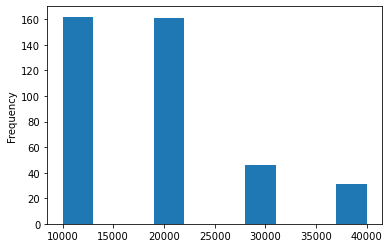

In [31]:
matzip['Price'].plot.hist()

In [32]:
try :
    matzip['Parking'].plot.hist()
except Exception as e :
    print(e)

no numeric data to plot


#### 비율로 표시하기

<AxesSubplot:ylabel='Frequency'>

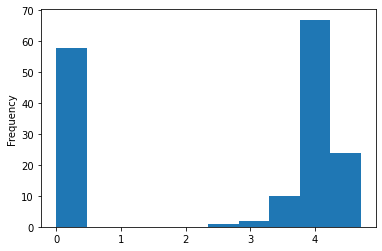

In [34]:
matzip.loc[matzip['Price'] <= 10000]['Rating'].plot.hist()

AttributeError: 'Rectangle' object has no property 'normed'

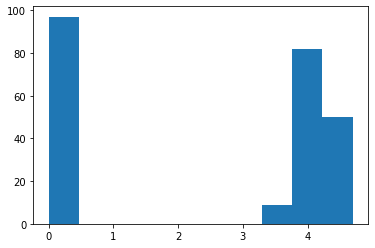

In [35]:
matzip.loc[matzip['Price'] >= 20000]['Rating'].plot.hist(normed=True)

<AxesSubplot:xlabel='Rating', ylabel='Price'>

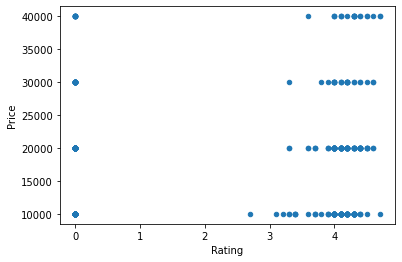

In [36]:
matzip.plot.scatter('Rating', 'Price')

In [37]:
matzip_star = matzip[(matzip.Rating >=  3) & (matzip.Price <= 20000)]

<AxesSubplot:xlabel='Rating', ylabel='Price'>

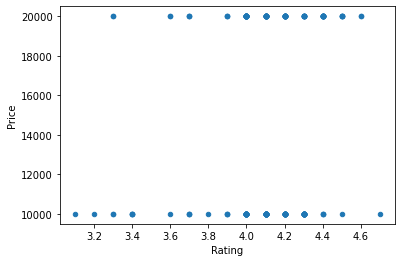

In [38]:
matzip_star.plot.scatter('Rating', 'Price')

In [39]:
matzip_food = matzip.set_index('Food')[['Rating','Price']]

In [40]:
matzip_food.index.value_counts().head()

카페 / 디저트            68
고기 요리               42
탕 / 찌개 / 전골         25
한정식 / 백반 / 정통 한식    25
이탈리안                24
Name: Food, dtype: int64

<AxesSubplot:ylabel='Frequency'>

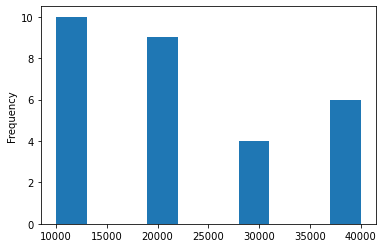

In [41]:
matzip_food.loc[['라멘 / 소바 / 우동','정통 일식 / 일반 일식',
                '회 / 스시','돈부리 / 일본 카레 / 벤토',
                '이자카야 / 오뎅 / 꼬치']]['Price'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

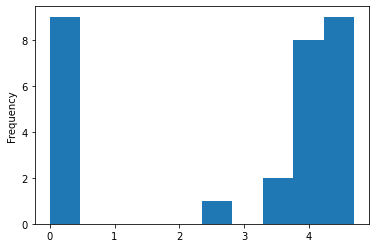

In [42]:
matzip_food.loc[['라멘 / 소바 / 우동','정통 일식 / 일반 일식',
                '회 / 스시','돈부리 / 일본 카레 / 벤토',
                '이자카야 / 오뎅 / 꼬치']]['Rating'].plot.hist()

<AxesSubplot:xlabel='Rating', ylabel='Price'>

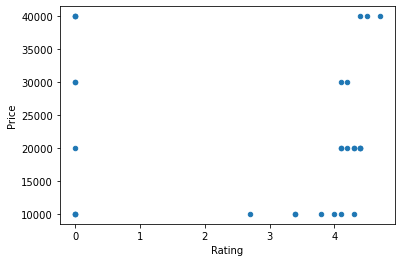

In [43]:
matzip_food.loc[['라멘 / 소바 / 우동','정통 일식 / 일반 일식',
                '회 / 스시','돈부리 / 일본 카레 / 벤토',
                '이자카야 / 오뎅 / 꼬치']].plot.scatter('Rating', 'Price')